In [136]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import rasterio as rio
from rasterio.plot import show
import fiona as f
import numpy as np
import matplotlib.lines as mlines
import matplotlib.font_manager as fm

In [3]:
plt.ion()

In [72]:
seadef = gpd.read_file('Data/seadef_sel.shp')
dtm = gpd.read_file('Data/Raster_tr35_dt3.shp')
points1 = gpd.read_file('Data/points1.shp')

In [82]:
points1.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [83]:
seadef.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [84]:
dtm.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<ipython-input-147-32a863fc4f12>:53: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  tmc = ccrs.TransverseMercator(sbllx, sblly)


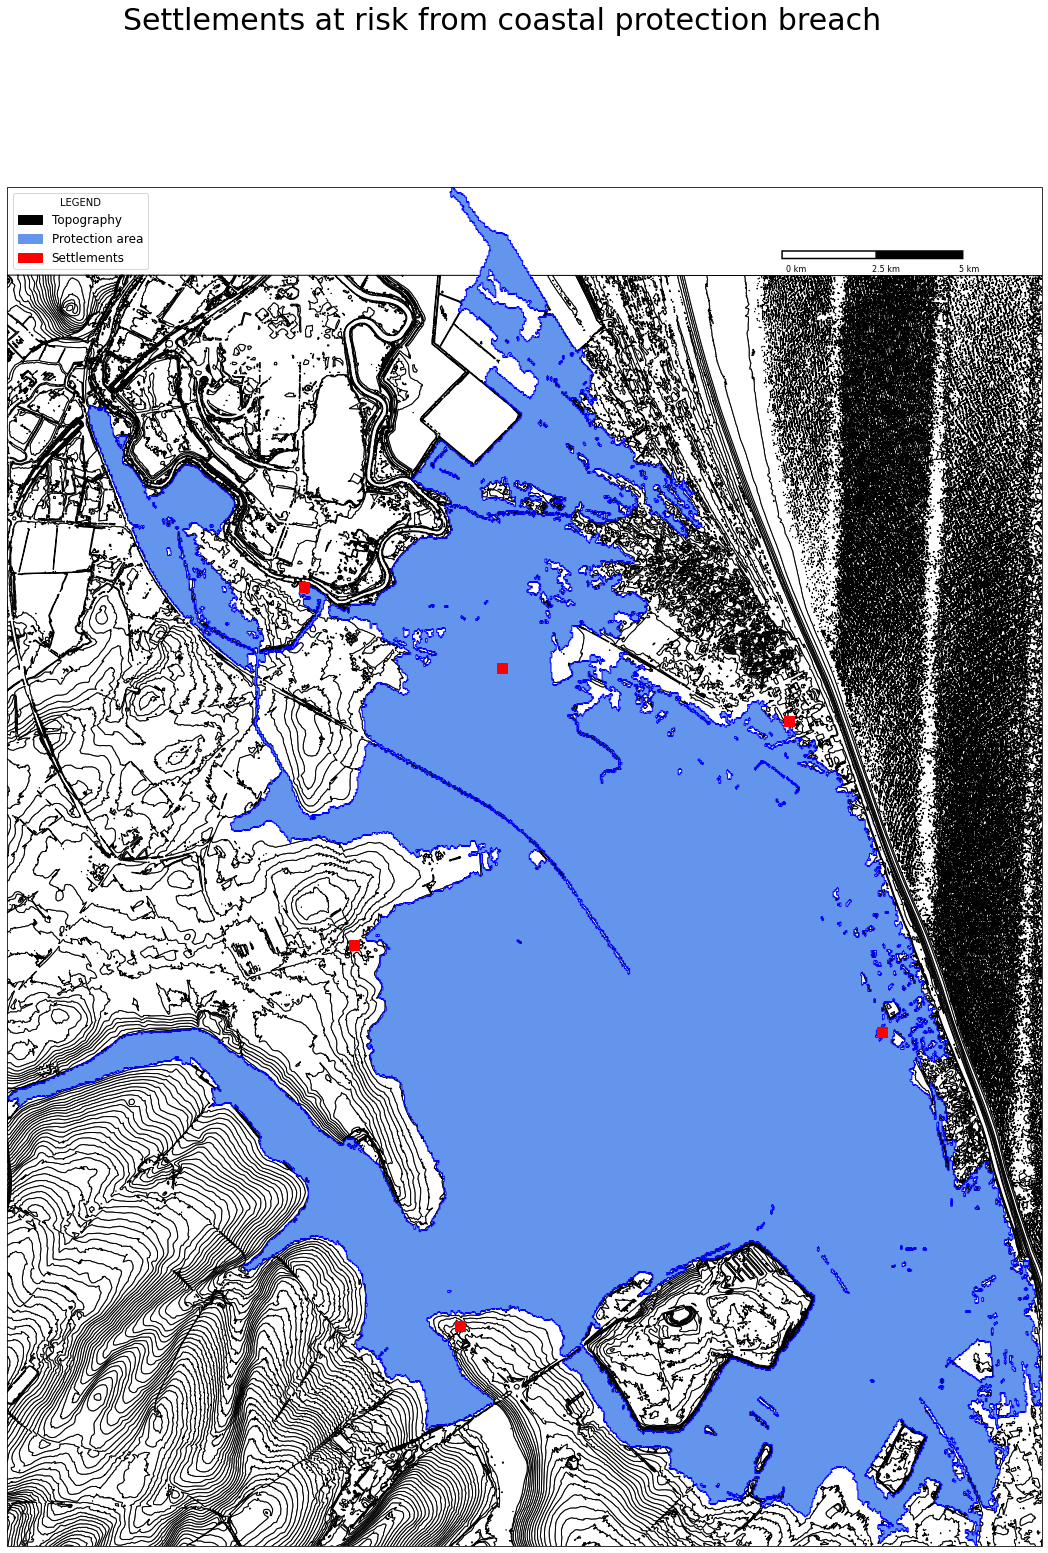

In [147]:
myFig = plt.figure(figsize=(25, 25))

myCRS = ccrs.UTM(31)

ax = plt.axes(projection=ccrs.Mercator(31))




top_feature = ShapelyFeature(dtm['geometry'], myCRS, edgecolor='black', facecolor='w')
xmin, ymin, xmax, ymax = dtm.total_bounds
ax.add_feature(top_feature)

ax.set_extent([xmin, xmax, ymin, ymax], crs=myCRS)


inset_feature = ShapelyFeature(seadef['geometry'], myCRS, edgecolor='blue', facecolor='CornflowerBlue')
xmin, ymin, xmax, ymax = seadef.total_bounds
ax.add_feature(inset_feature)
alpha = 1

end_feature = ax.plot(points1.geometry.x, points1.geometry.y, 's', color='red', ms=10, transform=myCRS)

def generate_handles(labels, colors, alpha=1):
    lc = len(colors) # get length of colors list
    handles = []
    for i in range(len(labels)):
        handles.append(mlines.Line2D([0, 1], [0, 1], linestyle='-', color=colors[i % lc], alpha=alpha))
    return handles

plt.suptitle('Settlements at risk from coastal protection breach', fontsize=30)

top_feature = mpatches.Patch(color='black', label='Topography')
inset_feature = mpatches.Patch(color='CornflowerBlue', label='Protection area')
end_feature = mpatches.Patch(color='red', label='Settlements')


plt.legend(handles=[top_feature, inset_feature, end_feature], fontsize=12, title="LEGEND")

gridlines = ax.gridlines(draw_labels=True,
                         xlocs=[-8, -7.5, -7, -6.5, -6, -5.5],
                         ylocs=[54, 54.5, 55, 55.5])

gridlines.left_labels = False
gridlines.bottom_labels = False
ax.set_extent([xmin, xmax, ymin, ymax], crs=myCRS)

def scale_bar(ax, location=(0.92, 0.95)):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    plt.plot([sbx, sbx - 1000], [sby, sby], color='k', linewidth=9, transform=tmc)
    plt.plot([sbx, sbx - 500], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx-500, sbx - 1000], [sby, sby], color='w', linewidth=6, transform=tmc)

    plt.text(sbx, sby-100, '5 km', transform=tmc, fontsize=8)
    plt.text(sbx-500, sby-100, '2.5 km', transform=tmc, fontsize=8)
    plt.text(sbx-1000, sby-100, '0 km', transform=tmc, fontsize=8)

scale_bar(ax)

plt.show()
